In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO


In [2]:
wd = 'D:/Projects/Watersheds/Ahmad/Analysis/initialHead'
os.chdir(wd)

In [3]:
df=pd.read_csv('dtw', delim_whitespace=True,skiprows=1,header=None)
np.shape(df.values)


(228459, 1)

In [4]:
h = np.reshape(df.values, (301, 759))
fh = np.flip(h, axis=0)

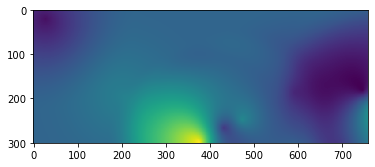

In [5]:
plt.imshow(fh, interpolation='none')
# plt.gca().invert_yaxis()
plt.show()

In [6]:
ncols = 759
nrows = 301
xllcorner = 397551
yllcorner = 5119140
cellsize = 200
noDATA = -999

In [12]:

f = StringIO()
np.savetxt(f, fh, fmt='%.3f')
f.seek(0)
fs = f.read().replace('-9999.000', '-9999', -1)
f.close()
f = open('init_result.asc', 'w')
f.write("ncols " + str(ncols) + "\n")
f.write("nrows " + str(nrows) + "\n")
f.write("xllcorner " + str(xllcorner) + "\n")
f.write("yllcorner " + str(yllcorner) + "\n")
f.write("cellsize " + str(cellsize) + "\n")
f.write("NODATA_value " + str(noDATA) + "\n")
f.write(fs)
f.close()